In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\DD\Desktop\ML PROJECTS\Unsupervised Learning\Mall_Customers.csv")

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39.0
1,2,Male,21.0,15,81.0
2,3,Female,20.0,16,6.0
3,4,Female,23.0,16,77.0
4,5,Female,31.0,17,40.0
...,...,...,...,...,...
195,196,Female,NaN,120,79.0
196,197,Female,NaN,126,28.0
197,198,Male,NaN,126,74.0
198,199,Male,NaN,137,18.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     190 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  187 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,190.000000,200.000000,187.000000
mean,100.500000,39.047368,60.560000,50.379679
std,57.879185,14.240670,26.264721,25.267392
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.000000,41.500000,35.000000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,71.500000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                 0
Gender                     0
Age                       10
Annual Income (k$)         0
Spending Score (1-100)    13
dtype: int64

In [7]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Spending Score (1-100)'].fillna(data['Spending Score (1-100)'].median(),inplace=True)

<Axes: >

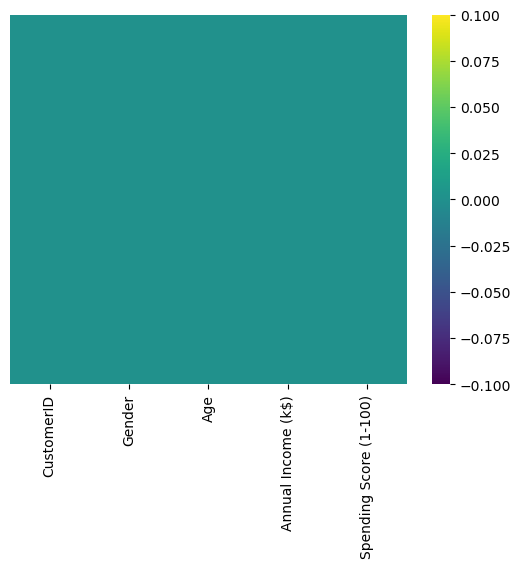

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


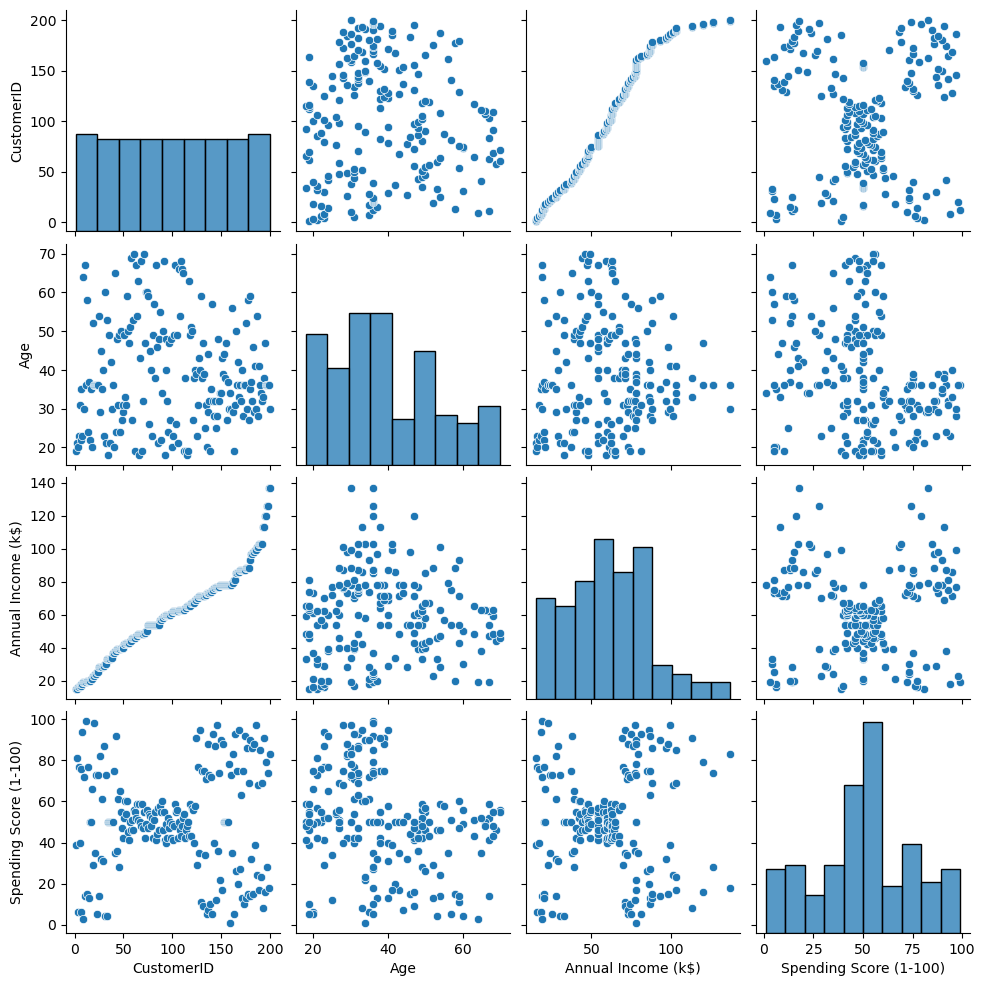

In [9]:
sns.pairplot(data)

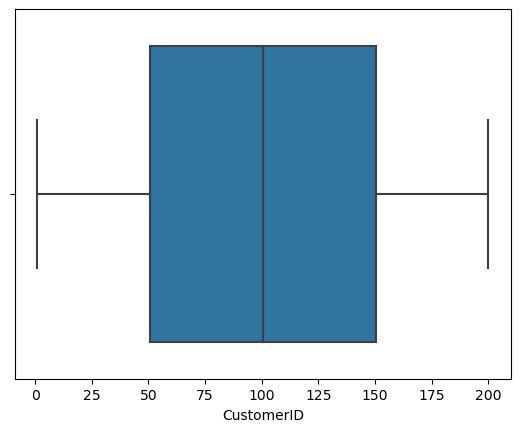

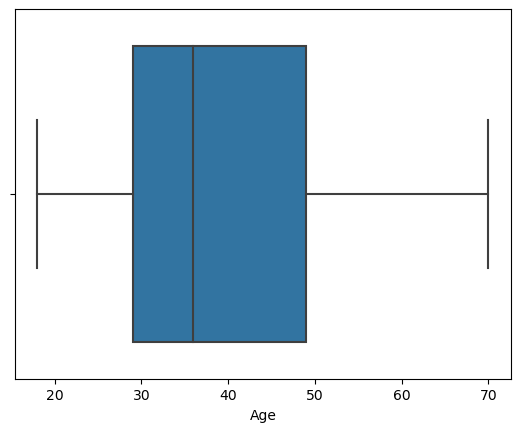

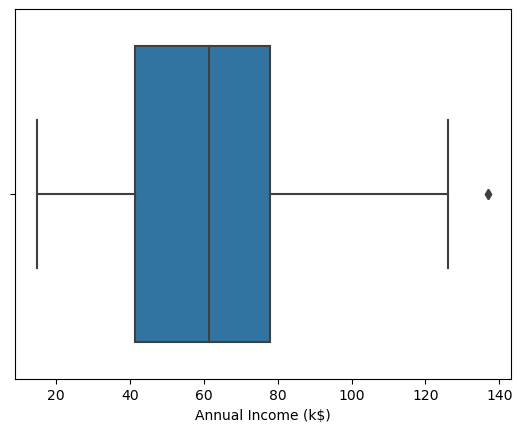

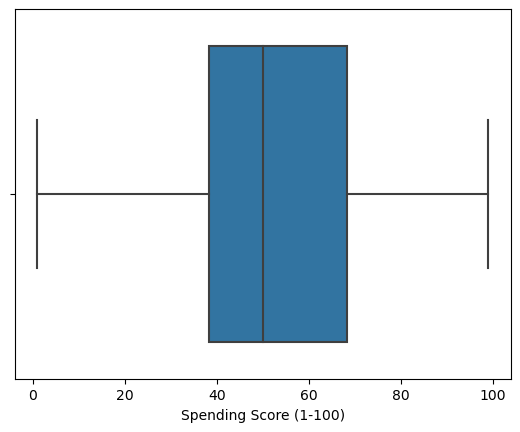

In [10]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i in numeric_columns:
    sns.boxplot(x=data[i])
    plt.show()

Text(0, 0.5, 'Count')

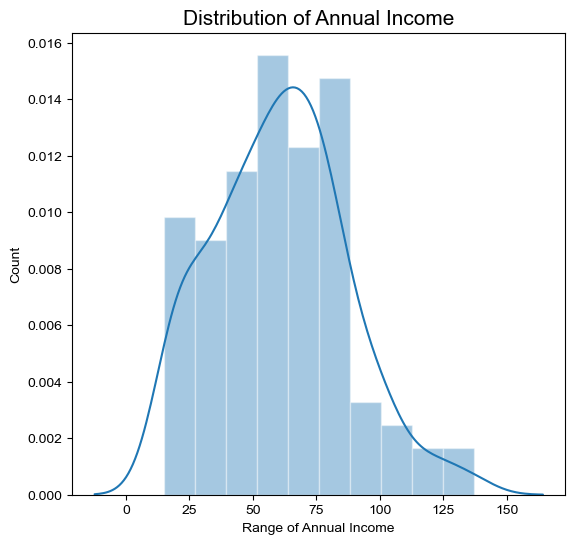

In [11]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

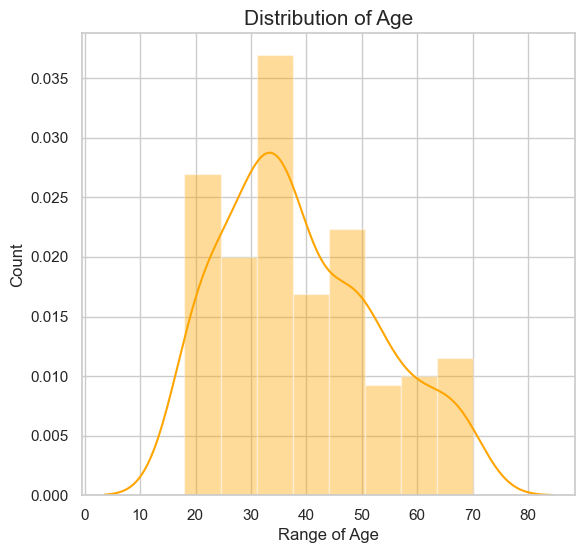

In [12]:
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'orange')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

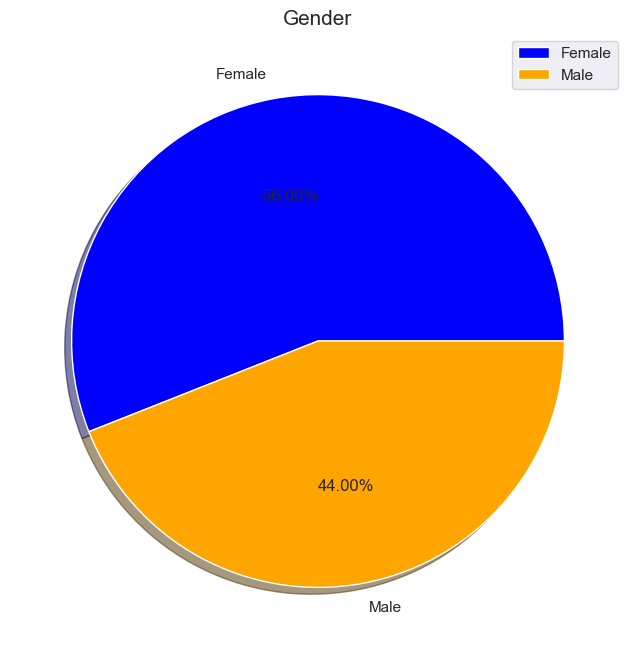

In [54]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['blue', 'orange']



plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

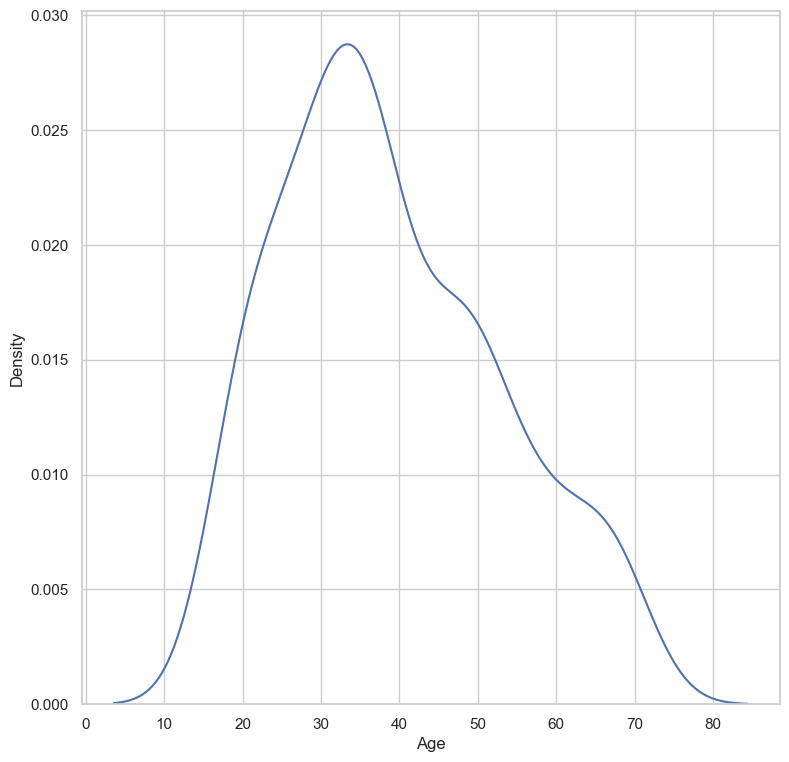

In [14]:
sns.kdeplot(x='Age',data=data)

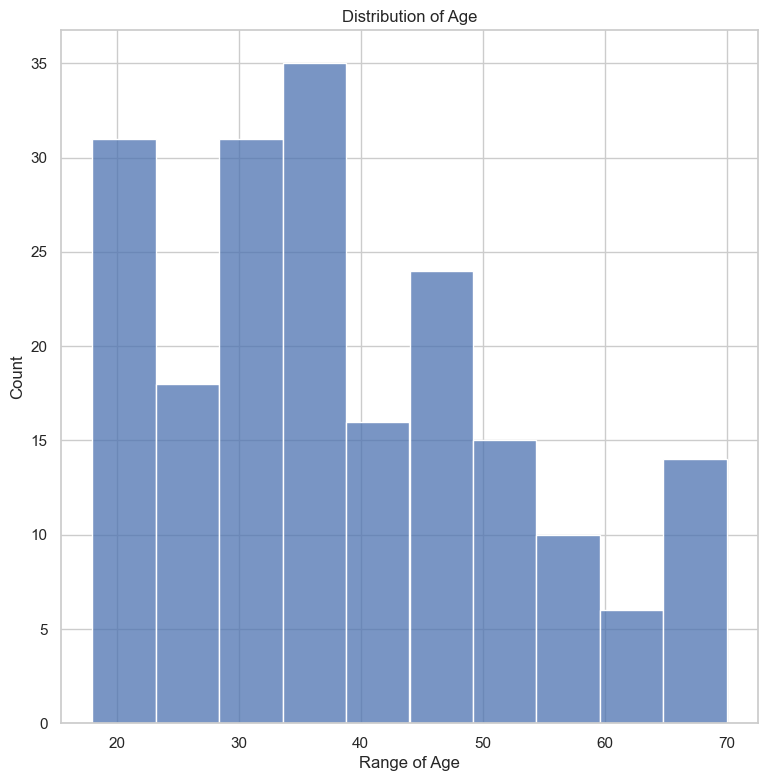

In [15]:
sns.histplot(data['Age'], bins=10, palette='hsv')
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Gender', ylabel='Gender'>

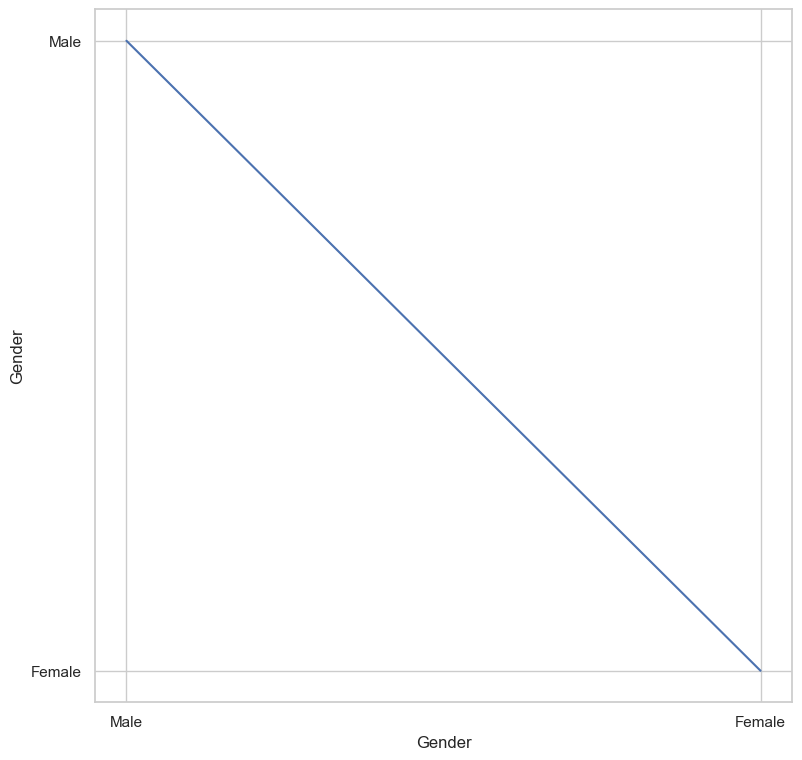

In [16]:
sns.lineplot(x='Gender',y='Gender',data=data)

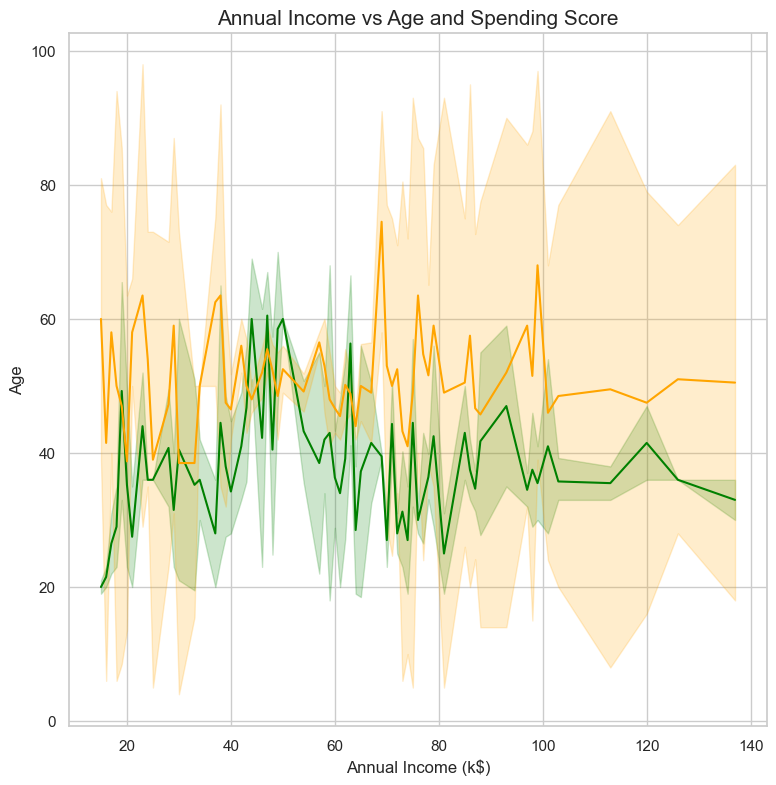

In [17]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x=x, y=y, color='green')  # Plot for 'Annual Income vs Age'
sns.lineplot(x=x, y=z, color='orange') # Plot for 'Annual Income vs Spending Score'
plt.title('Annual Income vs Age and Spending Score', fontsize=15)
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

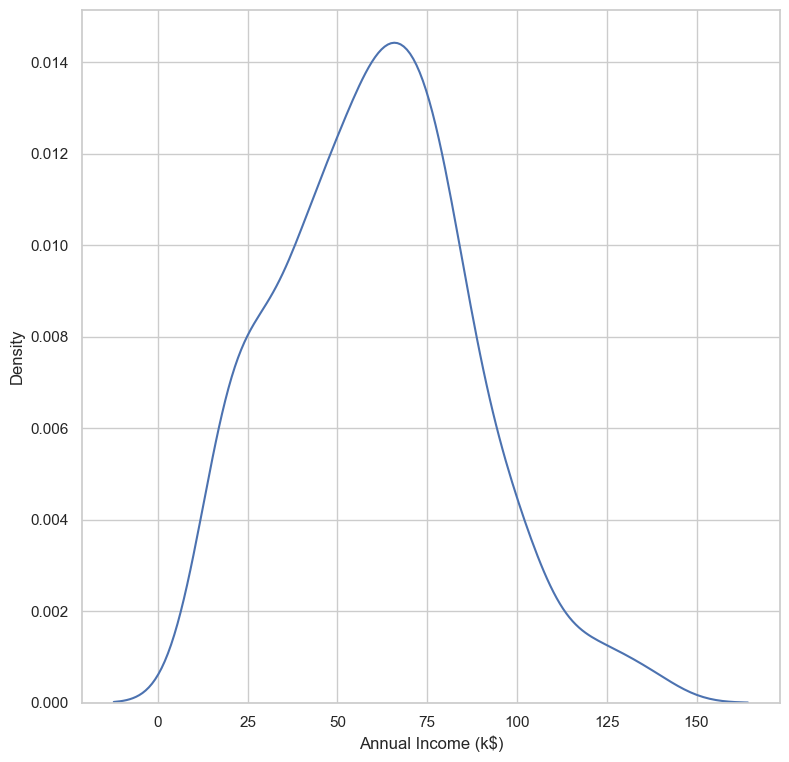

In [18]:
sns.kdeplot(x='Annual Income (k$)',data=data)

<Axes: xlabel='Gender', ylabel='Count'>

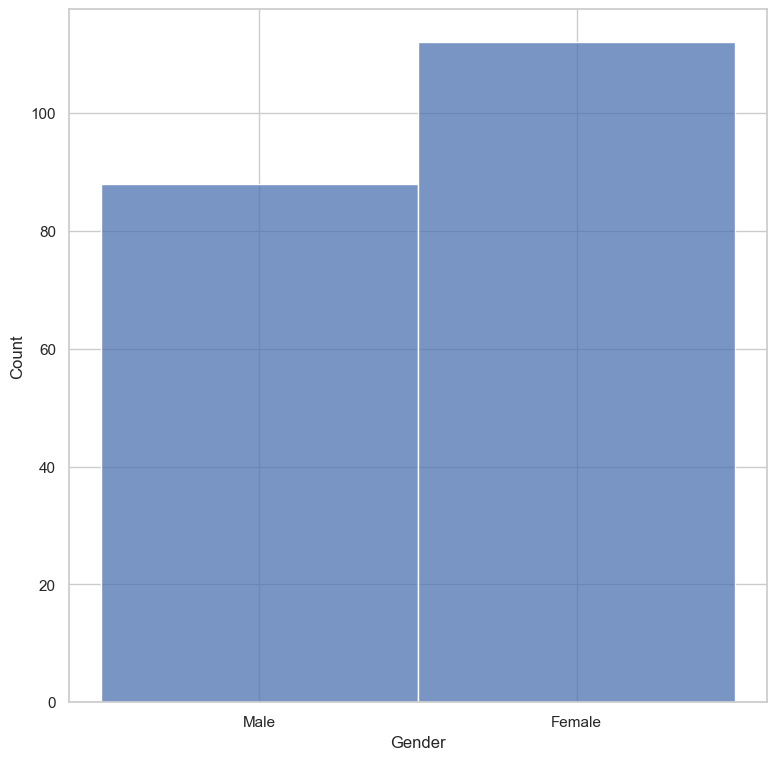

In [19]:
sns.histplot(x='Gender',data=data)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

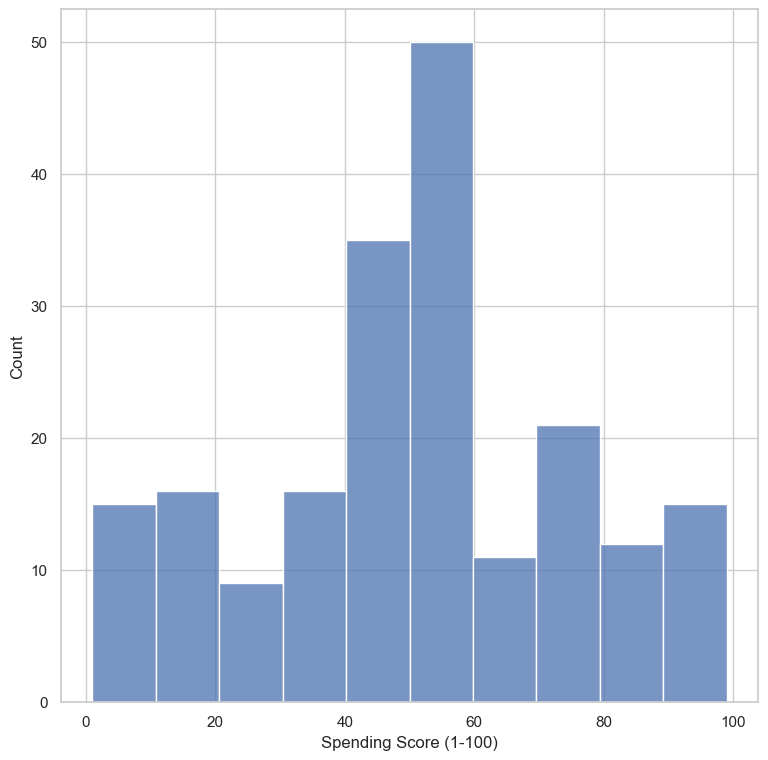

In [20]:
sns.histplot(x='Spending Score (1-100)',data=data)

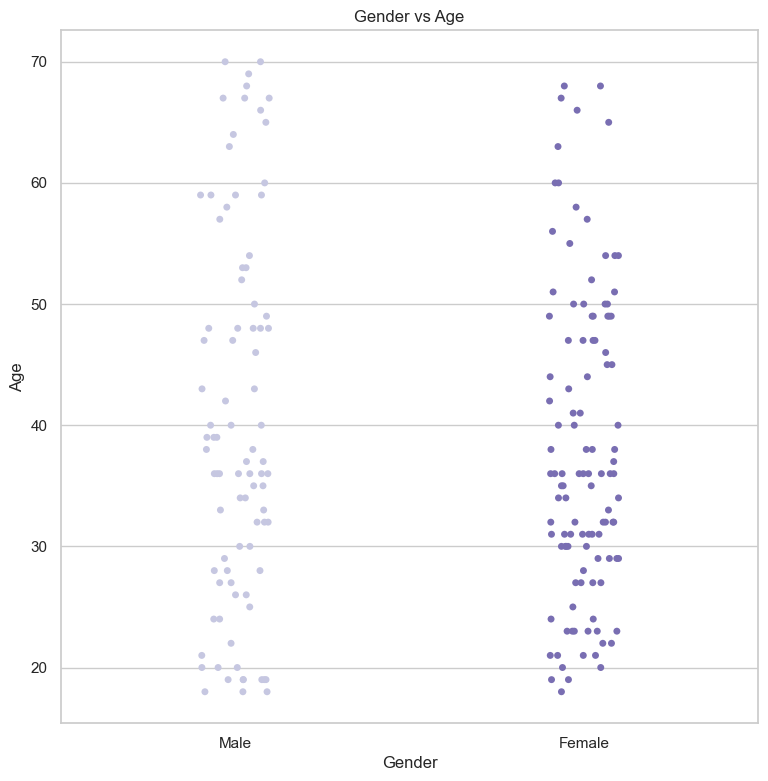

In [21]:
sns.stripplot(x=data['Gender'], y=data['Age'], palette='Purples')
plt.title('Gender vs Age')
plt.show()

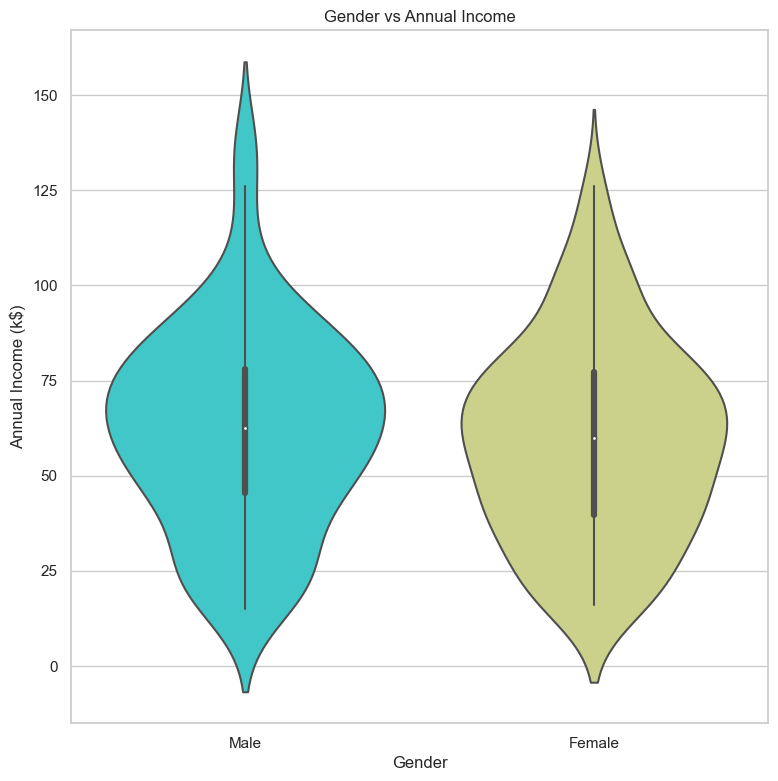

In [22]:
sns.violinplot(x=data['Gender'], y=data['Annual Income (k$)'], palette='rainbow')
plt.title('Gender vs Annual Income')
plt.show()

In [23]:
from scipy.stats import zscore
z_scores = zscore(data['Annual Income (k$)'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=data[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score: Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [24]:
x=(z_scores>-3)&(z_scores<3)
df=data[x]
print(df)

     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male  19.0                  15                    39.0
1             2    Male  21.0                  15                    81.0
2             3  Female  20.0                  16                     6.0
3             4  Female  23.0                  16                    77.0
4             5  Female  31.0                  17                    40.0
..          ...     ...   ...                 ...                     ...
195         196  Female  36.0                 120                    79.0
196         197  Female  36.0                 126                    28.0
197         198    Male  36.0                 126                    74.0
198         199    Male  36.0                 137                    18.0
199         200    Male  30.0                 137                    83.0

[200 rows x 5 columns]


In [25]:
dff=df.drop(['Gender'],axis=1)

In [26]:
dff

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15,39.0
1,2,21.0,15,81.0
2,3,20.0,16,6.0
3,4,23.0,16,77.0
4,5,31.0,17,40.0
...,...,...,...,...
195,196,36.0,120,79.0
196,197,36.0,126,28.0
197,198,36.0,126,74.0
198,199,36.0,137,18.0


In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(dff)
dff = scale.transform(dff)
features_scaled = pd.DataFrame( dff, columns= data.columns[0:4])
features_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,-1.435484,-1.738999,-0.465996
1,-1.706091,-1.291178,-1.738999,1.257635
2,-1.688771,-1.363331,-1.700830,-1.820277
3,-1.671450,-1.146872,-1.700830,1.093479
4,-1.654129,-0.569648,-1.662660,-0.424957


In [28]:
from sklearn.cluster import KMeans
#Elbow method

wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=25)
    kmeans.fit(features_scaled)
    
    wcss.append(kmeans.inertia_)

In [29]:
wcss

[799.9999999999998,
 515.1159818402758,
 378.86248891036837,
 268.1336994823401,
 221.5841139517122,
 179.1720378318771,
 162.19301398558645,
 145.2774404768173,
 133.67299665907174,
 118.57178678318206]

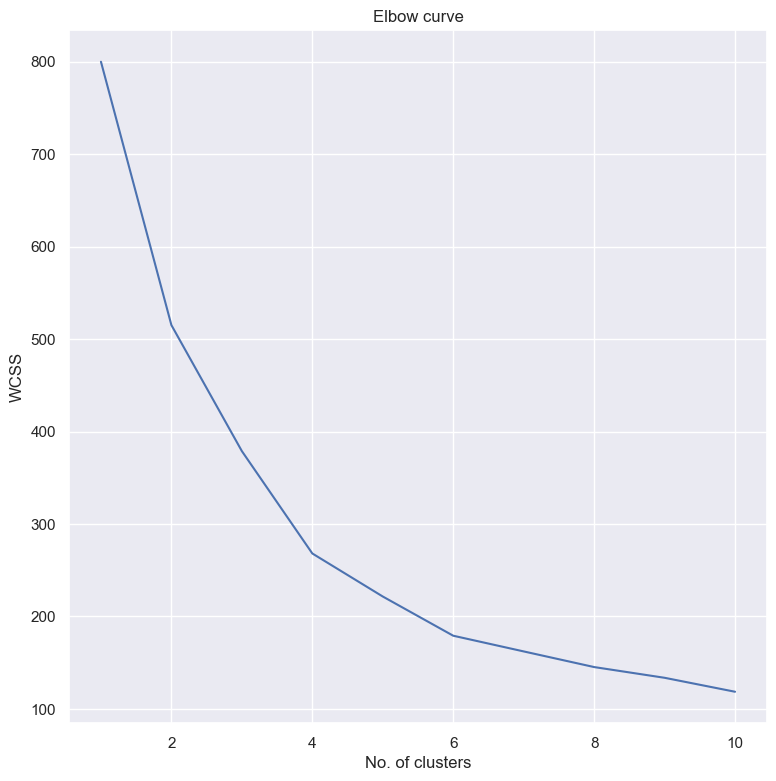

In [30]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y=kmeans.fit_predict(features_scaled)

In [32]:
print(y)

[2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 0 2 0 2 0 2 2
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 1 2 2 2 0 0 0 0 3 1 3 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [33]:
data_output = features_scaled.copy(deep = True)
data_output['Cluster'] = kmeans.labels_
data_output.head()

,CustomerID,Gender,Age,Annual Income (k$),Cluster
0,-1.723412,-1.435484,-1.738999,-0.465996,2
1,-1.706091,-1.291178,-1.738999,1.257635,2
2,-1.688771,-1.363331,-1.700830,-1.820277,2
3,-1.671450,-1.146872,-1.700830,1.093479,2
4,-1.654129,-0.569648,-1.662660,-0.424957,2


<Axes: xlabel='Cluster', ylabel='count'>

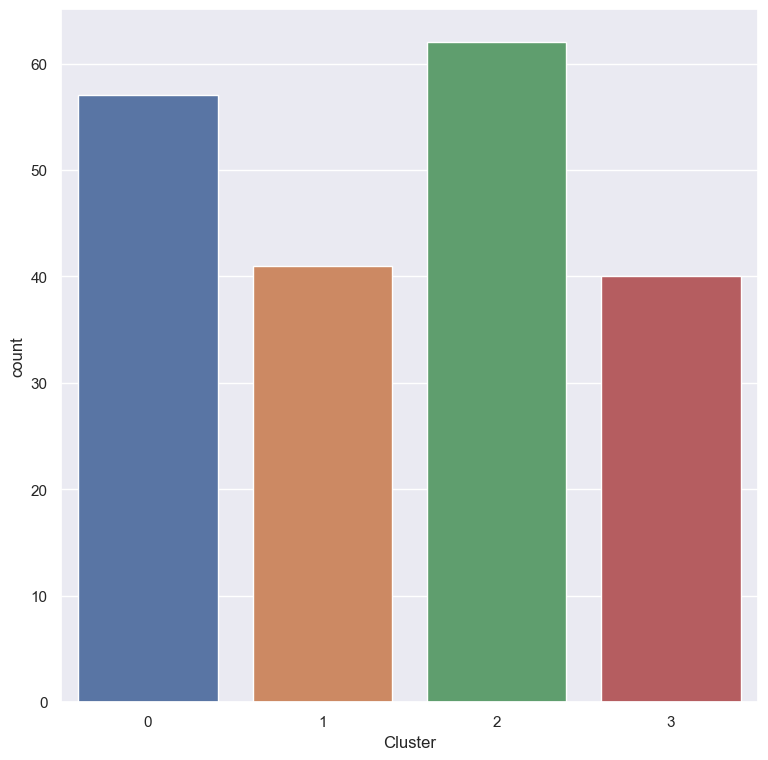

In [34]:
sns.countplot(x='Cluster',data=data_output)

In [37]:
np.unique(kmeans.labels_, return_counts=True)  

(array([0, 1, 2, 3]), array([71, 38, 57, 34], dtype=int64))

In [38]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
silhouette_avg = silhouette_score(features_scaled, y)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3940736473040689


In [39]:
calinski_harabasz_index = calinski_harabasz_score(features_scaled, y)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 129.59429705245145


In [40]:
davies_bouldin_index = davies_bouldin_score(features_scaled, y)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.9280589766773919


In [41]:
#Hierarchical clustering 

import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

In [42]:
Z = sch.linkage(features_scaled,method='ward')
Z

array([[2.10000000e+01, 2.30000000e+01, 5.15454685e-02, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 8.00380307e-02, 2.00000000e+00],
       [6.50000000e+01, 6.80000000e+01, 8.89163869e-02, 2.00000000e+00],
       [1.53000000e+02, 1.56000000e+02, 8.89163869e-02, 2.00000000e+00],
       [1.06000000e+02, 1.09000000e+02, 9.71432333e-02, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 9.77096554e-02, 2.00000000e+00],
       [1.14000000e+02, 1.15000000e+02, 1.10647206e-01, 2.00000000e+00],
       [9.20000000e+01, 9.60000000e+01, 1.29394423e-01, 2.00000000e+00],
       [1.33000000e+02, 1.37000000e+02, 1.34906716e-01, 2.00000000e+00],
       [1.17000000e+02, 1.19000000e+02, 1.37733249e-01, 2.00000000e+00],
       [4.80000000e+01, 4.90000000e+01, 1.45341780e-01, 2.00000000e+00],
       [1.13000000e+02, 2.06000000e+02, 1.57442484e-01, 3.00000000e+00],
       [8.40000000e+01, 8.70000000e+01, 1.66598355e-01, 2.00000000e+00],
       [8.30000000e+01, 8.50000000e+01, 1.69590671e

Text(0.5, 1.0, 'Hierarchical Clustering')

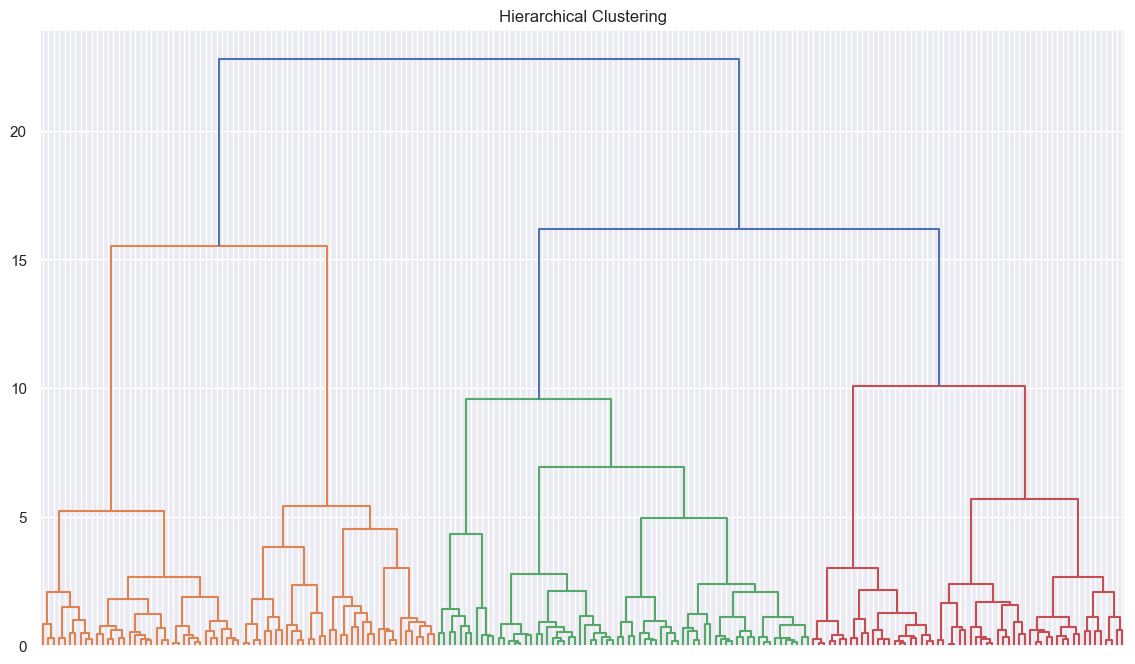

In [43]:
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
hc_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [46]:
y_cluster = hc_model.fit_predict(features_scaled)

In [47]:
y_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [48]:
data_out = features_scaled.copy(deep = True)
data_out['Cluster'] = hc_model.labels_
data_out.head()

,CustomerID,Gender,Age,Annual Income (k$),Cluster
0,-1.723412,-1.435484,-1.738999,-0.465996,0
1,-1.706091,-1.291178,-1.738999,1.257635,0
2,-1.688771,-1.363331,-1.700830,-1.820277,0
3,-1.671450,-1.146872,-1.700830,1.093479,0
4,-1.654129,-0.569648,-1.662660,-0.424957,0


In [49]:
np.unique(hc_model.labels_, return_counts=True)

(array([0, 1], dtype=int64), array([127,  73], dtype=int64))

In [50]:
silhouette_avg = silhouette_score(features_scaled, y_cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.30765207464216293


In [51]:
calinski_harabasz_index = calinski_harabasz_score(features_scaled, y_cluster)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 95.12518004324022


In [52]:
davies_bouldin_index = davies_bouldin_score(features_scaled, y_cluster)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 1.3122719763348933
